In [15]:
%matplotlib inline

import scipy.stats
import numpy as np  # the Python array package
import matplotlib.pyplot as plt  # the Python plotting package
import scipy.stats
from scipy.stats import gamma

import pandas as pd

In [5]:
x = np.arange(0, 25, 0.1)

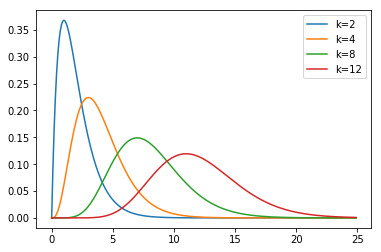

In [6]:
plt.plot(x, gamma.pdf(x, 2), label='k=2')
plt.plot(x, gamma.pdf(x, 4), label='k=4')
plt.plot(x, gamma.pdf(x, 8), label='k=8')
plt.plot(x, gamma.pdf(x, 12), label='k=12')

plt.legend()

In [7]:
def hrf(times):
    """ Return values for HRF at given times """
    # Gamma pdf for the peak
    peak_values = gamma.pdf(times, 6)
    # Gamma pdf for the undershoot
    undershoot_values = gamma.pdf(times, 12)
    # Combine them
    values = peak_values - 0.35 * undershoot_values
    # Scale max to 0.6
    return values / np.max(values) * 0.6

Text(0,0.5,'HRF model of signal')

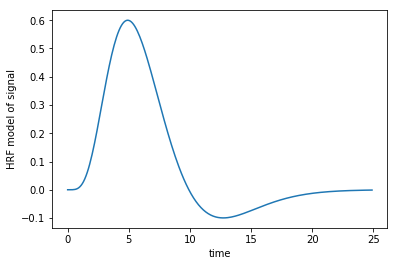

In [8]:
plt.plot(x, hrf(x))
plt.xlabel('time')
plt.ylabel('HRF model of signal')

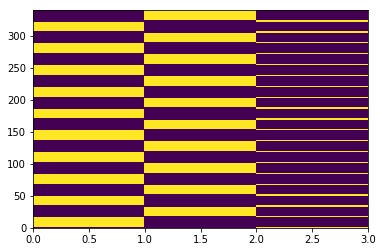

In [4]:
onsets_1back = np.array([4, 72, 140, 208, 276, 344, 412, 480, 548, 616])
onsets_2back = np.array([38, 106, 174, 242, 310, 378, 446, 514, 582, 650])

vol_num = 340

TR = 2
duration = 30

vector_n_back = np.zeros((vol_num, 3))

for i in range(len(vector_n_back)):
    if i in onsets_1back/TR:
        for k in range(int(duration/TR)):
            vector_n_back[i + k, 0] = 1
    if i in onsets_2back/TR:
        for k in range(int(duration/TR)):
            vector_n_back[i + k, 1] = 1
    else:
        continue
        
            
for i in range(len(vector_n_back)):
    if vector_n_back[i,0] == 0 and vector_n_back[i,1] == 0:
        vector_n_back[i,2] = 1
        
dual1back = vector_n_back[:,0].astype(bool)
dual2back = vector_n_back[:,1].astype(bool)

plt.pcolormesh(vector_n_back)
plt.show()


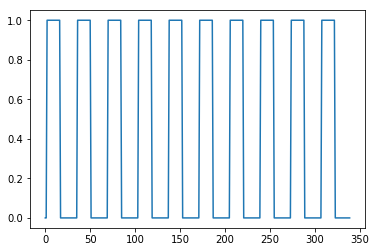

In [5]:
plt.plot(vector_n_back[:,0])

Text(0,0.5,'HRF sampled every 2.5 seconds')

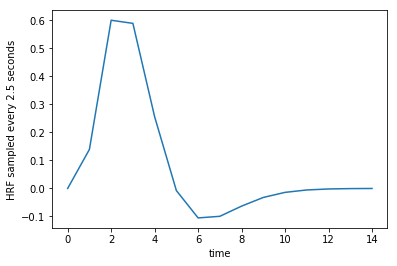

In [18]:
TR = 2

tr_times = np.arange(0, 30, TR)
hrf_at_trs = hrf(tr_times)

plt.plot(hrf_at_trs)
plt.xlabel('time')
plt.ylabel('HRF sampled every 2.5 seconds')

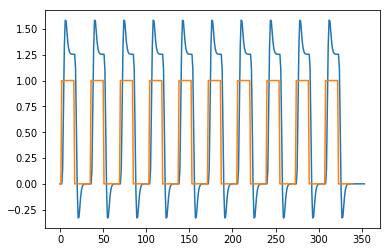

In [24]:
convolved = np.convolve(vector_n_back[:,0], hrf_at_trs)
plt.plot(convolved)
plt.plot(vector_n_back[:,0])

In [25]:
n_to_remove = len(hrf_at_trs) - 1
convolved = convolved[:-n_to_remove]

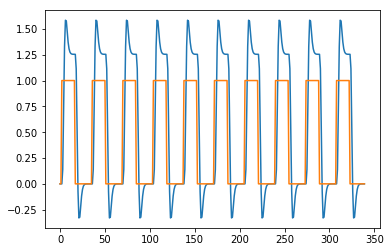

In [26]:
plt.plot(convolved)
plt.plot(vector_n_back[:,0])

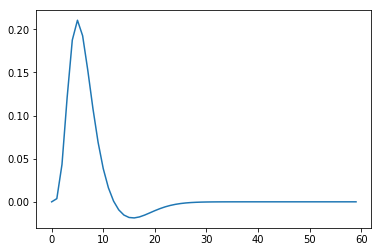

In [42]:
from nipy.modalities.fmri import hrf

x = hrf.spm_hrf_compat(np.arange(60))

plt.plot(x)

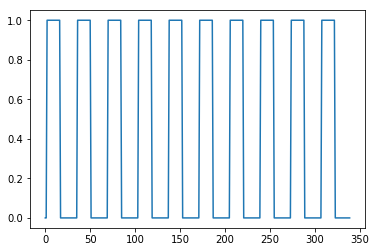

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from nistats import hemodynamic_models

plt.plot(vector_n_back[:,0])

,duration,onset,trial_type
0,4.0,0.0,intro
1,30.0,4.0,1-back
2,4.0,34.0,intro
3,30.0,38.0,2-back
4,4.0,68.0,intro
5,30.0,72.0,1-back
6,4.0,102.0,intro
7,30.0,106.0,2-back
8,4.0,136.0,intro
9,30.0,140.0,1-back


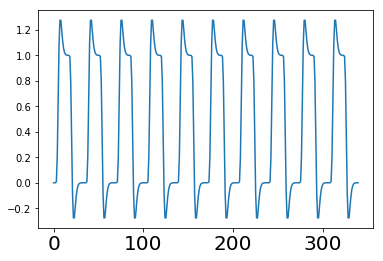

In [26]:
from nistats.reporting import plot_design_matrix
from nistats.design_matrix import make_design_matrix

t_r = 2
n_scans = 340

onsets_dir = '/home/finc/Dropbox/sub-02/onsets_dualnback.csv'

events = pd.read_csv(onsets_dir)
events

frame_times = np.arange(n_scans) * t_r
frame_times

design_matrix = make_design_matrix(frame_times, events, hrf_model = 'glover')
design_matrix = design_matrix.reset_index()

plt.plot(design_matrix['1-back'])